In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATOS_LIMPIOS.csv')
df.head(2)

,Unnamed: 0,course_id,grade,online_progress,user_id,category,hours,mdl_user_id,planta_name,1er acceso,ultimo acceso,planta_id,language_es
0,0,224,0.00,0.0,138,27,0.0,183,ABP Arrasate,"lunes, 4 de mayo de 2020, 17:04","martes, 13 de julio de 2021, 15:10",2,1
1,1,224,9.32,0.0,262,27,0.0,296,ABP Arrasate,"viernes, 18 de diciembre de 2020, 14:44","viernes, 1 de octubre de 2021, 15:56",2,1


In [6]:
df2 = pd.read_csv('DATOS_LIMPIOS2.csv')
df2.head(2)

,Unnamed: 0,course_id,grade,online_progress,user_id,category,hours,language,mdl_user_id,planta_name,1er acceso,ultimo acceso,planta_id,conocimiento_id,program_id,color,created_by,categoria_conocimiento_id,program_category_id
0,0,224,0.00,0.0,138,27,0,es,183.0,ABP Arrasate,"lunes, 4 de mayo de 2020, 17:04","martes, 13 de julio de 2021, 15:10",2.0,165.0,167.0,NaN,134.0,79.0,ESPECIALISTA
1,1,224,9.32,0.0,262,27,0,es,296.0,ABP Arrasate,"viernes, 18 de diciembre de 2020, 14:44","viernes, 1 de octubre de 2021, 15:56",2.0,165.0,167.0,NaN,134.0,79.0,ESPECIALISTA


In [9]:
df2['program_category_id'].unique()

array(['ESPECIALISTA', nan, 'SOPORTE&OPERARIO', 'GESTIÓN', 'TÉCNICO',
       'DUAL', 'FORMACIÓN'], dtype=object)

In [10]:
df2['grade'].describe()

count    6735.000000
mean        6.624229
std         5.229803
min         0.000000
25%         0.000000
50%         9.520000
75%        10.000000
max       100.000000
Name: grade, dtype: float64

####GRAFICO1

In [11]:
por_idioma = df.groupby('language_es').mean()
por_idioma

,Unnamed: 0,course_id,grade,online_progress,user_id,category,hours,mdl_user_id,planta_id
language_es,,,,,,,,,
0,1987.571429,153.428571,6.524286,31.712362,216.142857,27.142857,2.619048,253.380952,3.190476
1,2060.234622,188.565026,5.782779,33.633957,279.395431,30.251318,1.288225,310.855888,4.915641


In [12]:
euskera = df[df['language_es'] == 1]
castellano = df[df['language_es'] == 0]

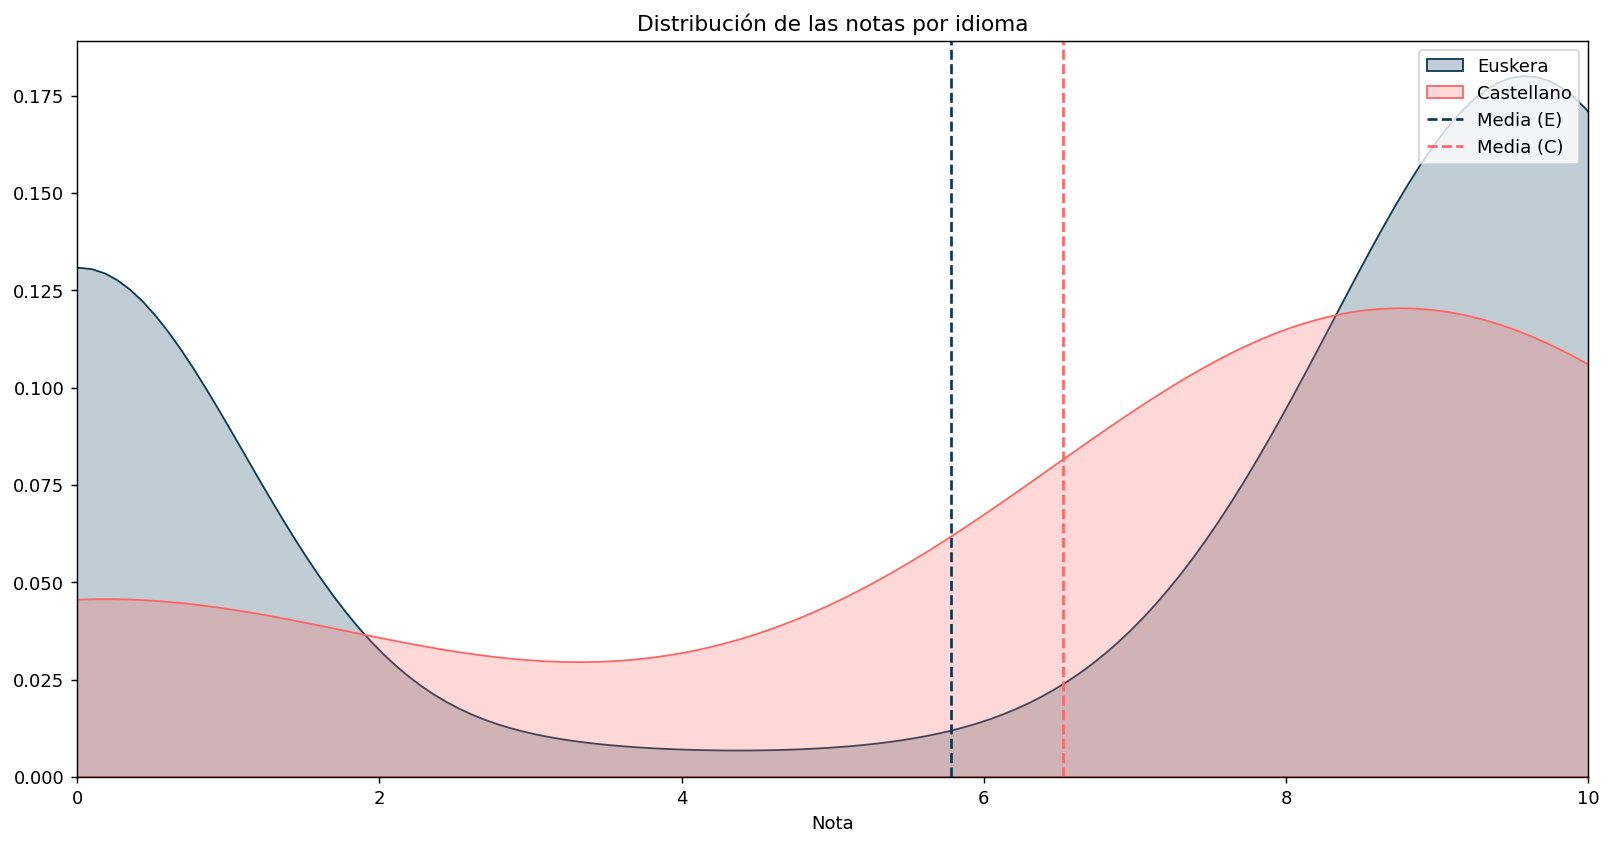

In [13]:

fig1,ax1 = plt.subplots()


ax1.set_xlim(0,10)

sns.kdeplot(x = "grade",data=euskera,shade=True,label="Euskera",color="#0B3954")
sns.kdeplot(x = "grade",data=castellano,shade=True,label="Castellano",color="#FF6663")
ax1.set_title('Distribución de las notas por idioma')
ax1.set_xlabel('Nota')
ax1.set_ylabel('')
fig1.set_size_inches(15,7.5)
fig1.set_dpi(130)


ax1.axvline(euskera['grade'].mean(),linestyle = '--',color="#0B3954",label = 'Media (E)')
ax1.axvline(castellano['grade'].mean(),linestyle = '--',color="#FF6663",label = 'Media (C)')
ax1.legend()

####GRAFICO2

In [14]:
por_planta = df.groupby('planta_name').mean().sort_values('grade',ascending=True)
por_planta = por_planta.reset_index()
por_planta

,planta_name,Unnamed: 0,course_id,grade,online_progress,user_id,category,hours,mdl_user_id,planta_id,language_es
0,LPC Usurbil,2079.687500,247.937500,0.803937,82.187500,315.250000,8.750000,0.500000,341.187500,10.0,1.000000
1,BULEGO OROKORRAK,1657.151515,190.515152,1.608485,17.741047,161.090909,29.484848,2.989899,182.818182,15.0,0.969697
2,Fagorederlan,1729.772727,124.909091,4.986818,60.882234,10.818182,3.272727,3.272727,23.000000,16.0,1.000000
3,MT Aretxabaleta,1853.066874,220.556765,5.526877,11.355242,350.418351,36.202177,0.505962,378.225505,5.0,0.990669
4,LPP Eskoriatza,2257.195876,203.061856,5.640526,45.410724,174.432990,27.061856,1.580756,210.835052,8.0,1.000000
5,ABP Bergara,2654.453947,105.973684,6.784717,68.437500,184.414474,21.973684,3.866228,232.993421,1.0,0.960526
6,ABP Arrasate,2298.159574,135.079787,7.159628,71.238180,204.877660,22.707447,1.414894,237.840426,2.0,0.957447
7,MT Aretxabal,1800.857143,233.142857,7.881429,14.285714,422.000000,37.714286,0.285714,443.000000,18.0,1.000000
8,LPD Arrasate,1663.000000,157.000000,8.790000,100.000000,152.000000,35.000000,8.000000,197.000000,9.0,1.000000


####GRAFICO3

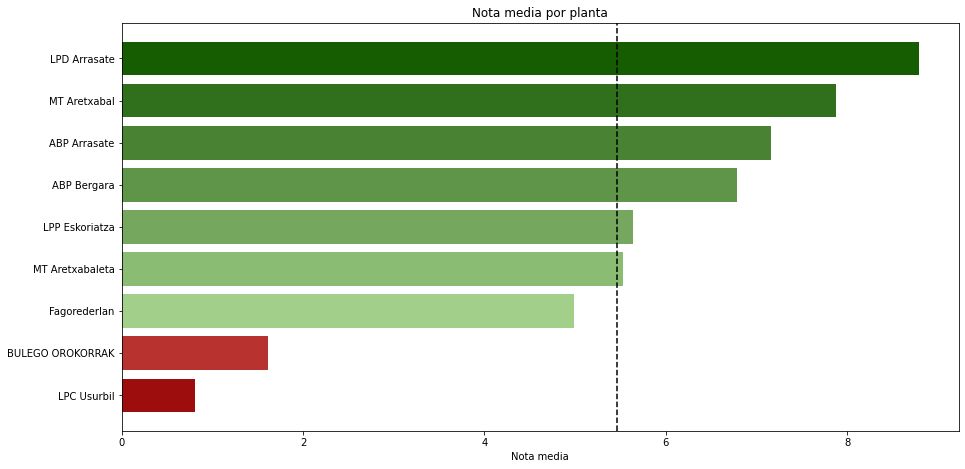

In [15]:
fig2,ax2 = plt.subplots()

ax2.barh(por_planta['planta_name'],por_planta['grade'],color = ['#9e0d0d','#b83330','#a2d08b','#8bbc74','#75a85e','#5e9548','#488232','#306f1b','#155d00'])




ax2.set_title('Nota media por planta')
ax2.set_xlabel('Nota media')
ax2.axvline(por_planta['grade'].mean(),linestyle="--",c="black")


fig2.set_size_inches(15,7.5)

In [16]:
category = df2["program_category_id"].value_counts()
category

TÉCNICO             7874
SOPORTE&OPERARIO    3604
ESPECIALISTA        2810
DUAL                 941
GESTIÓN              136
FORMACIÓN             40
Name: program_category_id, dtype: int64

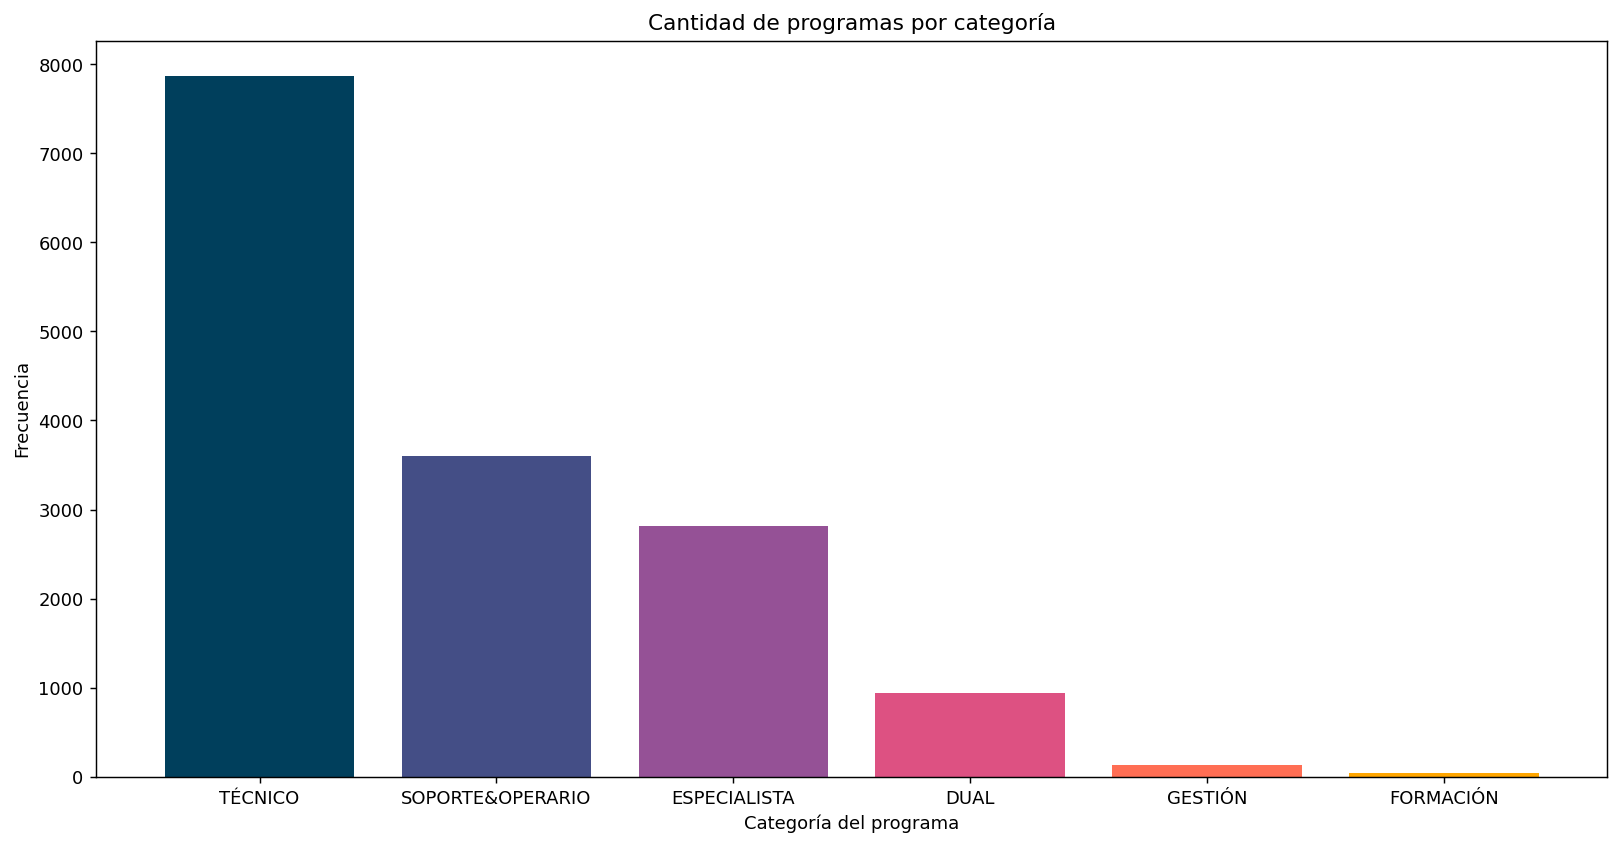

In [17]:
fig3,ax3 = plt.subplots()

ax3.bar(category.index,category.values,color = ["#003f5c","#444e86","#955196",
"#dd5182",
"#ff6e54",
"#ffa600"])

ax3.set_xlabel("Categoría del programa")
ax3.set_ylabel("Frecuencia")
ax3.set_title("Cantidad de programas por categoría")

fig3.set_size_inches(15,7.5)
fig3.set_dpi(130)

In [18]:
df2.head()

,Unnamed: 0,course_id,grade,online_progress,user_id,category,hours,language,mdl_user_id,planta_name,1er acceso,ultimo acceso,planta_id,conocimiento_id,program_id,color,created_by,categoria_conocimiento_id,program_category_id
0,0,224,0.00,0.0,138,27,0,es,183.0,ABP Arrasate,"lunes, 4 de mayo de 2020, 17:04","martes, 13 de julio de 2021, 15:10",2.0,165.0,167.0,NaN,134.0,79.0,ESPECIALISTA
1,1,224,9.32,0.0,262,27,0,es,296.0,ABP Arrasate,"viernes, 18 de diciembre de 2020, 14:44","viernes, 1 de octubre de 2021, 15:56",2.0,165.0,167.0,NaN,134.0,79.0,ESPECIALISTA
2,2,224,9.66,0.0,265,27,0,es,299.0,ABP Arrasate,"viernes, 18 de diciembre de 2020, 16:18","viernes, 18 de diciembre de 2020, 17:01",2.0,165.0,167.0,NaN,134.0,79.0,ESPECIALISTA
3,3,224,NaN,NaN,263,27,0,es,297.0,ABP Arrasate,--,--,2.0,165.0,167.0,NaN,134.0,79.0,ESPECIALISTA
4,4,224,NaN,NaN,264,27,0,es,298.0,ABP Arrasate,--,--,2.0,165.0,167.0,NaN,134.0,79.0,ESPECIALISTA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


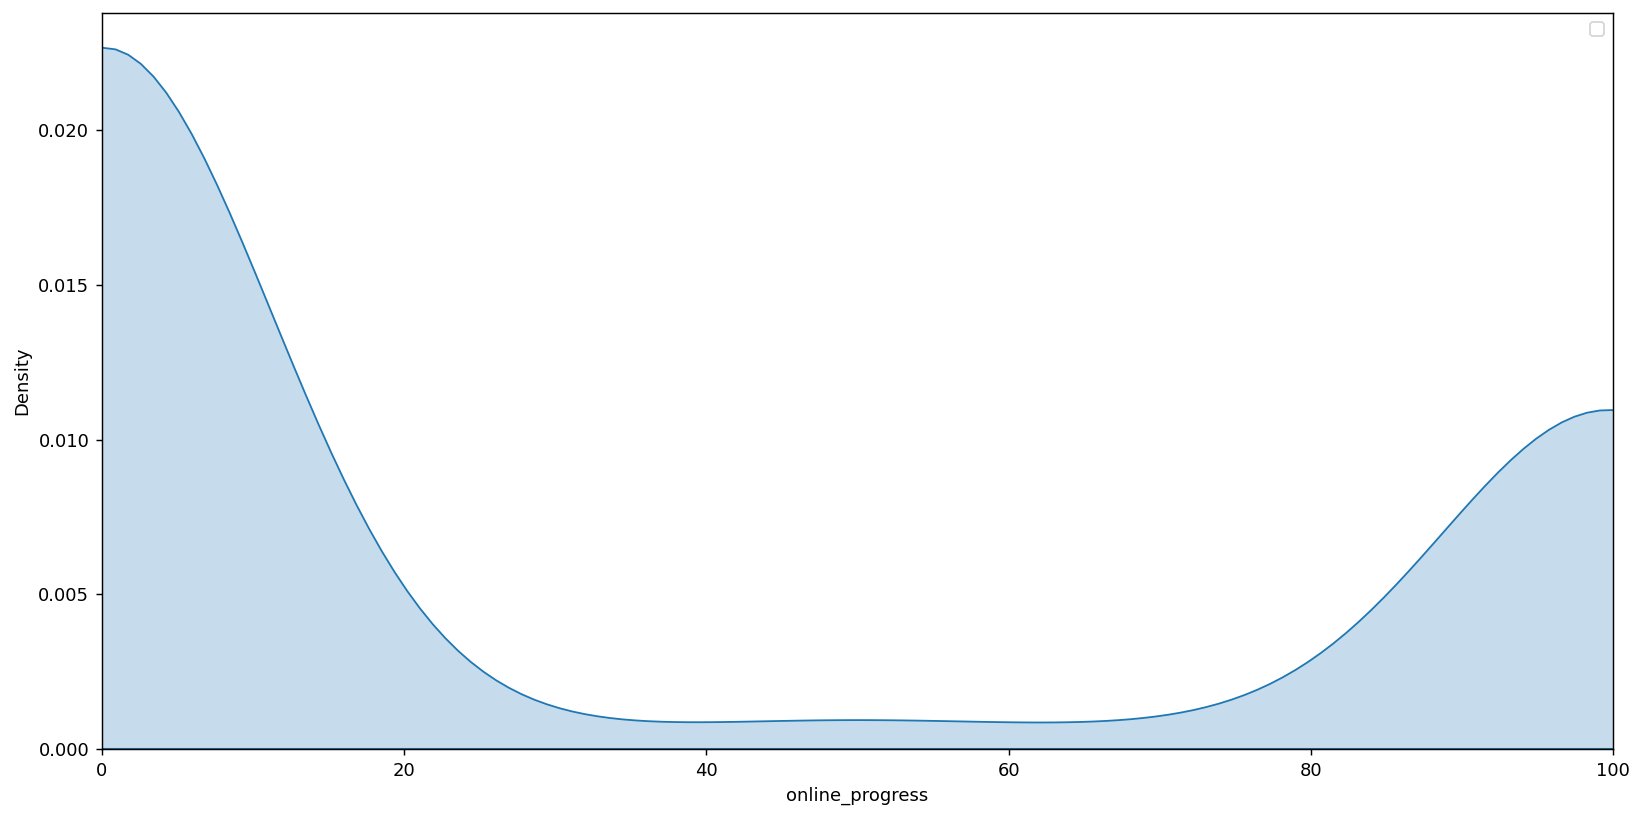

In [19]:
fig3,ax3 = plt.subplots()


sns.kdeplot(x = "online_progress",data=df,shade=True)

ax3.set_xlim(0,100)
fig3.set_size_inches(15,7.5)
fig3.set_dpi(130)

ax3.legend()

In [20]:
df.groupby('course_id')

In [21]:
df['course_id'] = df['course_id'].astype('category')
df['course_id'].dtypes

CategoricalDtype(categories=[ 10,  25,  35,  36,  50,  54,  59,  61,  62,  63,  66,  67,
                   69,  70,  72,  74,  86, 107, 109, 144, 157, 158, 193, 194,
                  196, 201, 202, 203, 205, 207, 212, 216, 217, 218, 219, 220,
                  222, 223, 224, 225, 230, 231, 232, 234, 235, 236, 237, 239,
                  240, 246, 247, 248, 249, 250, 251, 252, 254, 268, 272, 273,
                  274, 275, 276, 277, 278, 279, 280, 282, 285, 286, 287, 288,
                  290, 298, 299, 301, 302, 303, 304, 305],
, ordered=False)

In [22]:
df['course_id'] = df['course_id'].astype(str)

In [23]:
course=pd.DataFrame(df['course_id'].value_counts().sort_values(ascending=False).head(5)).reset_index().rename(columns={'index':'course_id','course_id':'value'})
course = course.sort_values('value',ascending = True)
course

,course_id,value
4,220,76
3,282,82
2,216,85
1,212,87
0,218,93


In [24]:
course_menos=pd.DataFrame(df['course_id'].value_counts().sort_values(ascending=True).head(5)).reset_index().rename(columns={'index':'course_id','course_id':'value'})
course_menos = course_menos.sort_values('value',ascending = True)
course_menos

,course_id,value
0,301,1
1,302,1
2,236,1
3,86,1
4,250,1


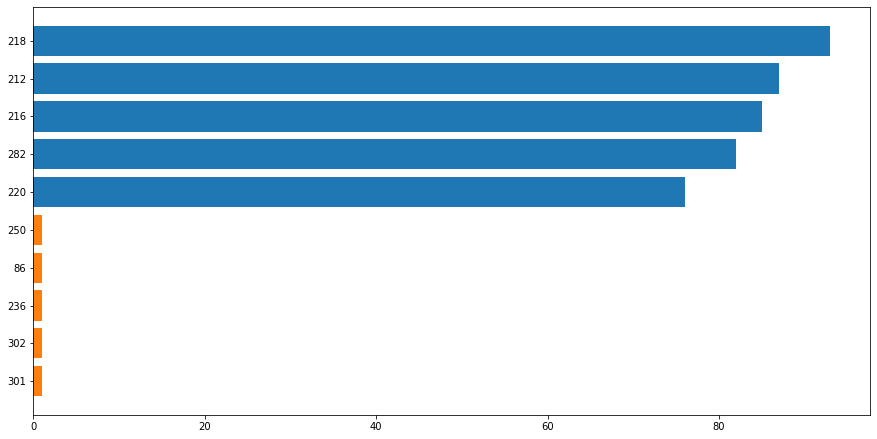

In [25]:
fig4,ax4 = plt.subplots()

ax4.barh(course_menos['course_id'],course_menos['value'],color = 'tab:orange')

ax4.barh(course['course_id'],course['value'],color = 'tab:blue')



fig4.set_size_inches(15,7.5)